In [1]:
import numpy as np
import torch
import torch.nn as nn
import cv2
import os
import matplotlib.pyplot as plt

### Data Exploration

#### OCID

In [2]:
rgb_dataset_path = '../ocid/ARID10_crops/squared_rgb/'
depth_dataset_path = '../ocid/ARID10_crops/surfnorm++/'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


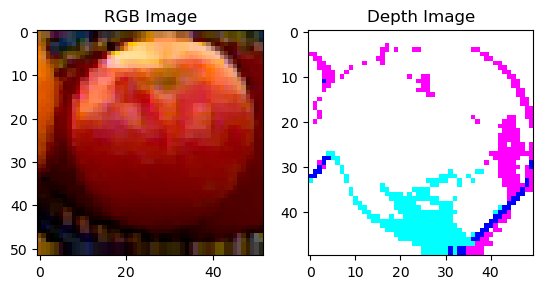

In [3]:
trial_img_name = 'apple/apple_1/04_ARID10tablebottomcurvedseq18_apple_1_4.png'

rgb_img = cv2.cvtColor(cv2.imread(os.path.join(rgb_dataset_path, trial_img_name)), cv2.COLOR_BGR2RGB)
depth_img = cv2.imread(os.path.join(depth_dataset_path, trial_img_name), cv2.IMREAD_UNCHANGED)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title('RGB Image')
plt.subplot(1, 2, 2)
plt.imshow(depth_img)
plt.title('Depth Image')
plt.show()

In [5]:
depth_img.min(), depth_img.max()

(0, 65025)

#### RCFusion

In [14]:
from torchvision.models import resnet18, ResNet18_Weights

In [22]:
resnet18_model = resnet18(weights=ResNet18_Weights.DEFAULT)
resnet18_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [23]:
resnet18_model.forward(torch.rand(1, 3, 224, 224))

tensor([[-6.3623e-01, -4.0846e-01, -6.6099e-01, -1.6402e+00, -7.9944e-01,
         -2.6138e-01, -5.3545e-01,  5.1961e-01,  4.1357e-01, -7.1752e-01,
         -1.0611e+00, -8.2605e-01, -3.3059e-01, -9.5788e-01, -1.0577e+00,
         -5.5665e-01, -7.9246e-01, -2.1217e-01, -5.2232e-01, -6.7353e-01,
         -1.5735e+00, -5.6305e-01, -1.3187e+00,  2.5766e-01, -8.4558e-01,
         -1.0088e+00, -7.3545e-01, -1.0746e+00, -7.6898e-01, -4.3761e-01,
         -8.6289e-01, -8.8627e-01, -5.4466e-01, -5.9509e-01, -4.5595e-01,
         -3.5772e-01,  5.7463e-01, -6.2289e-01, -5.1944e-01, -7.8176e-03,
         -7.6313e-01, -8.6331e-01, -1.0558e+00, -4.0254e-01, -6.0740e-01,
         -4.2559e-01, -8.0970e-01, -5.5835e-01, -1.1536e+00, -1.1166e+00,
         -5.3790e-01,  5.1347e-01, -1.9005e-01, -4.8102e-01, -2.1269e-01,
         -1.1518e+00, -1.8750e-01, -1.3745e+00, -3.7931e-01, -4.9203e-01,
          8.1944e-01,  2.0491e-01, -1.1149e-01,  2.9021e-01, -7.0031e-01,
         -1.3225e-01, -2.9102e-01, -3.